#### Getting json data from https://jmcauley.ucsd.edu/data/amazon/

In [1]:
import gzip
import json
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
## download json data and reads the data into pandas dataframe
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

baby_df = getDF('reviews_Baby_5.json.gz')
# beauty_df = getDF('reviews_Beauty_5.json.gz')
# accessories_df = getDF('reviews_Clothing_Shoes_and_Jewelry_5.json.gz')
# grocery_food_df = getDF('reviews_Grocery_and_Gourmet_Food_5.json.gz')
musical_df = getDF('reviews_Musical_Instruments_5.json.gz')
office_prod_df = getDF('reviews_Office_Products_5.json.gz')
toys_games_df = getDF('reviews_Toys_and_Games_5.json.gz')

In [3]:
musical_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [4]:
## Feature creation (category) for each df.
baby_df = baby_df[['reviewText']]
baby_df['Category'] = 'baby_products'

# beauty_df = beauty_df[['reviewText']]
# beauty_df['Category'] = 'beauty_products'

# accessories_df = accessories_df[['reviewText']]
# accessories_df['Category'] = 'accessories'

# grocery_food_df = grocery_food_df[['reviewText']]
# grocery_food_df['Category'] = 'grocery_food_products'

musical_df = musical_df[['reviewText']]
musical_df['Category'] = 'musical_instruments'

office_prod_df = office_prod_df[['reviewText']]
office_prod_df['Category'] = 'office_products'

toys_games_df = toys_games_df[['reviewText']]
toys_games_df['Category'] = 'toys_games_products'

In [5]:
musical_df.head(2)

,reviewText,Category
0,"Not much to write about here, but it does exac...",musical_instruments
1,The product does exactly as it should and is q...,musical_instruments


In [6]:
office_prod_df.head(2)

,reviewText,Category
0,"I bought my first HP12C in about 1984 or so, a...",office_products
1,WHY THIS BELATED REVIEW? I feel very obliged t...,office_products


In [7]:
df = pd.concat([baby_df,musical_df,office_prod_df,toys_games_df])
df

,reviewText,Category
0,Perfect for new parents. We were able to keep ...,baby_products
1,This book is such a life saver. It has been s...,baby_products
2,Helps me know exactly how my babies day has go...,baby_products
3,I bought this a few times for my older son and...,baby_products
4,I wanted an alternative to printing out daily ...,baby_products
...,...,...
167592,This drone is very fun and super duarable. Its...,toys_games_products
167593,This is my brother's most prized toy. It's ext...,toys_games_products
167594,This Panther Drone toy is awesome. I definitel...,toys_games_products
167595,This is my first drone and it has proven to be...,toys_games_products


In [8]:
df['Category'].value_counts()

toys_games_products    167597
baby_products          160792
office_products         53258
musical_instruments     10261
Name: Category, dtype: int64

In [9]:
# Taking some sample data from each category. we can use groupby 
df = df.groupby('Category').tail(5000)
df['Category'].value_counts()

toys_games_products    5000
office_products        5000
baby_products          5000
musical_instruments    5000
Name: Category, dtype: int64

### Text Cleaning

In [10]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [11]:
def clean(text):
    text=text.lower()
    url_removed=re.sub(r'https\S+','',text,flags=re.MULTILINE)
    num_removed=re.sub("[^a-zA-Z]"," ",url_removed)
    text=re.sub("\.+"," ",num_removed)
    word_tokens=word_tokenize(text)
    text=[word for word in word_tokens if word  not in stop_words]
    cleaned_text=[word for word in text if word not in string.punctuation]
    return " ".join(cleaned_text)

In [12]:
## feature creation of cleaned text
df['cleanedText'] = df['reviewText'].apply(lambda x: clean(x))
## feature creation of labels for categories
labels = {'baby_products':0,
          'musical_instruments':1,
          'office_products':2,
          'toys_games_products':3
         }
df['labelCategory'] = df['Category'].map(labels)

In [13]:
df

,reviewText,Category,cleanedText,labelCategory
155792,"The refills are OK, because they are cheaper t...",baby_products,refills ok cheaper name brand refills however ...,0
155793,We've been using the diaper genie branded refi...,baby_products,using diaper genie branded refills long time e...,0
155794,This product has more bags than the Playtex ve...,baby_products,product bags playtex version put diapers diape...,0
155795,Perfectly fitting ourDiaper Genie Elite Diaper...,baby_products,perfectly fitting ourdiaper genie elite diaper...,0
155796,"Great alternative to the diaper genie ones, sa...",baby_products,great alternative diaper genie ones fit less e...,0
...,...,...,...,...
167592,This drone is very fun and super duarable. Its...,toys_games_products,drone fun super duarable easy use kids love de...,3
167593,This is my brother's most prized toy. It's ext...,toys_games_products,brother prized toy extremely durable performs ...,3
167594,This Panther Drone toy is awesome. I definitel...,toys_games_products,panther drone toy awesome definitely recommend...,3
167595,This is my first drone and it has proven to be...,toys_games_products,first drone proven excellent choice since firs...,3


In [14]:
# Before feeding datas into model we need to shuffle the DataFrame rows to learn model better
shuffled_df = df.sample(frac = 1) 
shuffled_df

,reviewText,Category,cleanedText,labelCategory
163356,"Perfect, like all of Melissa and Doug kid prod...",toys_games_products,perfect like melissa doug kid products cars lo...,3
51193,Don't really see the point of desk accoutremen...,office_products,really see point desk accoutrements like coupl...,2
50564,This is a good quality binder. The Amazon des...,office_products,good quality binder amazon description accurat...,2
157082,"Four infant feeding bottles (plastic, but the ...",baby_products,four infant feeding bottles plastic label says...,0
9756,"I like the capo, only it seems a little stiff ...",musical_instruments,like capo seems little stiff opening put take ...,1
...,...,...,...,...
8149,this is the 2nd tuner like this that I have pu...,musical_instruments,nd tuner like purchased really dependable work...,1
49591,The pen has a very nice chrome satin finish.Th...,office_products,pen nice chrome satin finish python accent pri...,2
157852,I love these blankets! The colors are vibrant ...,baby_products,love blankets colors vibrant prints fun soft g...,0
158166,"I must say, I think you'll find this has a gap...",baby_products,must say think find gap usage new parents chil...,0


### Train test split

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(shuffled_df['cleanedText'],
                                                 shuffled_df['labelCategory'],
                                                 random_state = 10,
                                                 test_size=0.2)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16000,)
(16000,)
(4000,)
(4000,)


### Preprocessing`

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
## Tokenizer
tokenizer=Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)
word_index=tokenizer.word_index
dict(list(word_index.items())[0:20])

{'<OOV>': 1,
 'one': 2,
 'like': 3,
 'use': 4,
 'great': 5,
 'would': 6,
 'well': 7,
 'good': 8,
 'get': 9,
 'really': 10,
 'also': 11,
 'little': 12,
 'easy': 13,
 'baby': 14,
 'much': 15,
 'time': 16,
 'set': 17,
 'printer': 18,
 'nice': 19,
 'even': 20}

In [19]:
train_sequences=tokenizer.texts_to_sequences(x_train)
print(train_sequences[0])
print(len(train_sequences[0]))

[71, 29, 105, 595, 1465, 2511, 881, 73, 75, 231, 3098, 15, 1767, 408, 136, 7, 3400, 5566, 2436, 77, 5566, 887, 283, 646, 231, 3098, 186, 225, 73, 5567, 691, 2, 5566, 231, 1852, 570, 2610, 910, 1335, 323, 2698, 487, 400, 457, 2362, 104, 409, 273, 273, 1924, 1175, 9657, 105, 355, 164, 1428, 4699, 89, 4975, 561, 932, 174, 3294, 1428, 137, 4700, 587, 11, 127, 2086, 1492, 2436, 2412, 63, 7, 13741, 103, 164, 16, 136, 55, 3, 3783, 15, 63]
85


In [20]:
test_sequences=tokenizer.texts_to_sequences(x_test)
print(test_sequences[0])

[447, 277, 809, 684, 562, 680, 87, 2, 1985, 8, 307, 441, 12, 2, 213, 29, 405]


In [21]:
vocab=dict(list(word_index.items()))
print(vocab['oily'])
print(vocab['faithfully'])

10204
14522


(array([6854., 5734., 3072., 1670.,  919.,  513.,  374.,  243.,  192.,
         102.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <BarContainer object of 10 artists>)

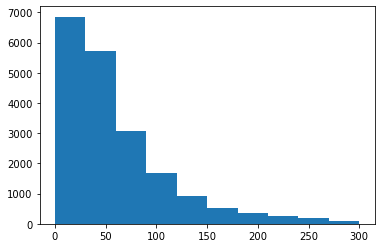

In [22]:
## Before doing padding we need to find the max_length (approx also we can give)
shuffled_df["max_len"]=shuffled_df["cleanedText"].apply(lambda x:len(x.split()))

import matplotlib.pyplot as plt
# plt.hist(shuffled_df['max_len'])
plt.hist(shuffled_df['max_len'],range=(0,300))

In [23]:
## padding
max_length=250
trunc_type='post'
padding_type='post'
train_padded=pad_sequences(train_sequences,
                           maxlen=max_length,
                           padding=padding_type,
                           truncating=trunc_type)

In [24]:
print(train_padded[0])

[   71    29   105   595  1465  2511   881    73    75   231  3098    15
  1767   408   136     7  3400  5566  2436    77  5566   887   283   646
   231  3098   186   225    73  5567   691     2  5566   231  1852   570
  2610   910  1335   323  2698   487   400   457  2362   104   409   273
   273  1924  1175  9657   105   355   164  1428  4699    89  4975   561
   932   174  3294  1428   137  4700   587    11   127  2086  1492  2436
  2412    63     7 13741   103   164    16   136    55     3  3783    15
    63     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [25]:
test_padded=pad_sequences(test_sequences,
                          maxlen=max_length,
                          padding=padding_type,
                          truncating=trunc_type)

In [26]:
print(test_padded[0])

[ 447  277  809  684  562  680   87    2 1985    8  307  441   12    2
  213   29  405    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

### Model Building

In [27]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [28]:
print(len(word_index))
vocab_size=len(word_index)+1
print(vocab_size)
embedding_dim=300 # each and every word will have 300 values

28939
28940


In [29]:
lstm_model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim), # creates word embedddings layer (input layer)
    tf.keras.layers.LSTM(128), # units is nothing but number of hidden neurons in the lstm gates (forget,input,output)
    tf.keras.layers.Dense(4,activation='softmax')
])

In [30]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         8682000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               219648    
_________________________________________________________________
dense (Dense)                (None, 4)                 516       
Total params: 8,902,164
Trainable params: 8,902,164
Non-trainable params: 0
_________________________________________________________________


In [31]:
opt=tf.keras.optimizers.Adam(0.01)
lstm_model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
num_epochs=3

In [32]:
print(train_padded.shape)
print(test_padded.shape)
print(y_train.shape)
print(y_test.shape)

(16000, 250)
(4000, 250)
(16000,)
(4000,)


In [33]:
histoy=lstm_model.fit(train_padded,y_train,epochs=num_epochs,validation_data=(test_padded,y_test),verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/3
16000/16000 - 1550s - loss: 1.3756 - accuracy: 0.3114 - val_loss: 1.2549 - val_accuracy: 0.3790
Epoch 2/3
16000/16000 - 1455s - loss: 0.9910 - accuracy: 0.5651 - val_loss: 0.7509 - val_accuracy: 0.7278
Epoch 3/3
16000/16000 - 1782s - loss: 0.5311 - accuracy: 0.8112 - val_loss: 0.5195 - val_accuracy: 0.8223


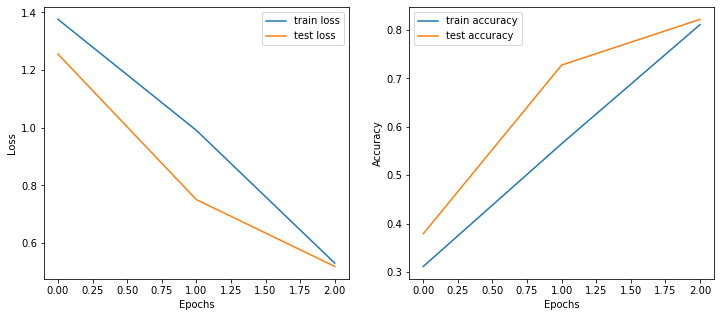

In [35]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(histoy.history['loss'])
plt.plot(histoy.history['val_loss']);
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train loss', 'test loss']);
ax = plt.subplot(122)
plt.plot(histoy.history['accuracy'])
plt.plot(histoy.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train accuracy', 'test accuracy']);

#### Testing with an example review

In [42]:
txt={"This is a bit too complicated for my 10 yr old daughter, but I bet next year it will be great."}
seq=tokenizer.texts_to_sequences(txt)
padded=pad_sequences(seq,maxlen=max_length,padding=padding_type,truncating=trunc_type)
pred=lstm_model.predict(padded)
cat_labels=list(labels.keys())
print("Prediction for the four classes:",pred)
print("The Category is:",cat_labels[np.argmax(pred)])# Gives the index value from the prediction

Prediction for the four classes: [[0.24535616 0.03893853 0.00538557 0.71031976]]
The Category is: toys_games_products


## Model save

In [43]:
lstm_model.save("final_lstm_model.h5")

In [44]:
## Want to load the saved model and check?
new_model = tf.keras.models.load_model('final_lstm_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         8682000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               219648    
_________________________________________________________________
dense (Dense)                (None, 4)                 516       
Total params: 8,902,164
Trainable params: 8,902,164
Non-trainable params: 0
_________________________________________________________________


In [45]:
## Testing the saved model with the same above example
check_new_model_pred=new_model.predict(padded)
cat_labels2=list(labels.keys())
print("Prediction for the four classes:",check_new_model_pred)
print("The Category is:",cat_labels2[np.argmax(check_new_model_pred)])

Prediction for the four classes: [[0.24535616 0.03893853 0.00538557 0.71031976]]
The Category is: toys_games_products
